In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
conf_matrix_decimals = np.array([[0.930, 0.031, 0.040],
                                [0.071, 0.837, 0.092],
                                [0.125, 0.126, 0.749]])

In [9]:
def binomial_error_element(conf_matrix, row, col):
    value = conf_matrix[row][col]
    if row == col:  # Diagonal elements (TP for each class in one-vs-all)
        total = sum(conf_matrix[row]) + sum(row[col] for row in conf_matrix) - value
    else:  # Off-diagonal elements (misclassifications)
        total = sum(conf_matrix[row]) if row != col else sum(row[col] for row in conf_matrix)
        
    proportion = value / total
    SE = np.sqrt(proportion * (1 - proportion) / total)

    return SE

errors_matrix = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        errors_matrix[i, j] = binomial_error_element(conf_matrix_decimals, i, j)

print(errors_matrix)

[[0.38050107 0.17314725 0.19576749]
 [0.25682484 0.41585093 0.28902595]
 [0.33071891 0.33184936 0.44470361]]


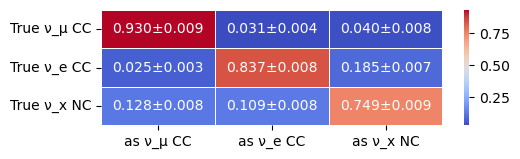

In [7]:
variable_names1 = ['as ν_μ CC', 'as ν_e CC', 'as ν_x NC']
variable_names2 = ['True ν_μ CC', 'True ν_e CC', 'True ν_x NC']

annot_arr = np.array([['0.930±0.009','0.031±0.004', '0.040±0.008'],
                      ['0.025±0.003','0.837±0.008', '0.185±0.007'],
                      ['0.128±0.008','0.109±0.008', '0.749±0.009']], dtype = str)

plt.figure(figsize = (5.5,1.5))
heatmap = sns.heatmap(conf_matrix_decimals, annot=annot_arr, cmap='coolwarm', fmt="s", linewidths=.5, square=False)
heatmap.set_xticklabels(variable_names1, rotation=0)
heatmap.set_yticklabels(variable_names2, rotation=0)
#plt.title("Confusion Matrix")±±±±±
plt.show()